<a href="https://www.kaggle.com/code/lxlz1986/per-capita-income-prediction?scriptVersionId=143029021" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Table of Contents
 1. [Introduction](#Introduction) 
 2. [Get the Data and Explore the Dataset](#Get-the-Data-and-Explore-the-Dataset)
 3. [Data Visualization and Analysis](#Data-Visualization-and-Analysis)
 4. [Model Trainning](#Model-Trainning)
 5. [Model Validation](#Model-Validation)
 6. [Prediction Visulization](#Prediction-Visulization)


*************************************************************************************************

## 1. Introduction
In this project, we will use a simple dataset to learn how to complete a machine learning project with the guide of machine learning pipeline. The following diagrams shows the components that make up a typical machine learning pipeline.  
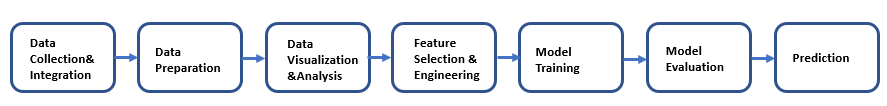

The goal of the project is to use available features in a dataset to make predictions. 

The models we used here are two regression models: **Linear Regression** and **Polynomial Regression**, and both of them are the basic and important machine learning models.  

### About the Dataset
The pubic dataset [Canada_per_capita_income](https://www.kaggle.com/datasets/amalab182/canada-per-capita-income) provides the average income per capita over a specific period(from 1970 to 2016) in Canada and includes totally 47 rows and 2 columns: **year** and **income**. The information contained in this dataset can help people better understand the economic trends in Canada.


After Exporing the dataset we will find that this dataset in practice could not prodive sufficient information to predict the income, since only the single feature **year** cannot determin the **income**, or income is not much relevant to the years number. However, it is still a good example to demonstrate the machine learning pipeline and how to train a Linear Regression model in Scikit-Learn at the beginning. 

*************************************************************************************************

## 2. Get the Data and Explore the Dataset

In [ ]:
# import necessary python packages

import pandas as pd
import numpy as np
import pandas as pd


# import matplotlib package
import matplotlib.pyplot as plt


# import relevant machine learninging packages from Scikit-Learn
from sklearn.model_selection import train_test_split # dataset splitting
from sklearn.linear_model import LinearRegression # Linear Regression model
from sklearn.metrics import mean_squared_error # evaluation metric Mean Squared Error(MSE)
from sklearn.preprocessing import PolynomialFeatures # feature extending in Polynomia Regression model
from sklearn.model_selection import cross_val_score # cross-validation model

Import dataset into a DataFrame **capita_GDP**.

In [ ]:
capita_GDP = pd.read_csv('/kaggle/input/canada-per-capita-income/Canada_per_capita_income.csv')

Explore dataset using `info()` function to get the general infomation about the datasest, such as the number of rows, columns and data type of each column.

In [ ]:
capita_GDP.info()

Looking at the first 5 records in the dataset.

In [ ]:
capita_GDP.head()

## 3. Data Visualization and Analysis

Since there are only two columns in the dataset, in order to have a big picture of the dataset and relationship among data, we can plot the dataset with the help of `matlibplot` library. 

In [ ]:
plt.figure(figsize=(10, 6)) # set figure size
plt.plot(capita_GDP["year"], capita_GDP["income"], 'b.') # plot 'income' vs.'year'
plt.title('Cancada per capita income over years') # add figure title
plt.xlabel("Year") # add x-axis label
plt.ylabel("Per Capita Income") # add y-axis label
plt.axis([1970,2025,0,50000])# set axis range
plt.grid(True)# show grid in the figure
plt.show()

From the figure we find that the relationship between **income** and **year** is not ideal linear. In order to predict income for future, we can try both Linear Regression model and Polynommial Regression model.

## 4. Model trainning
### 4.1 Choosing prediction target and features

In [ ]:
# Chose column income as prediction target y
y = capita_GDP[['income']]

# Chose column year as Feature X
X= capita_GDP[['year']]

### 4.2 Data splitting
Hier we need to splite the dataset into training dataset to train the model and test dataset to validate/evaluate the trained model. We will typically choose 20% of the data for validation and the rest for training purpose.

In [ ]:
# Split the data randomly into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.3 Model training using Linear Regression and Polymonial Regression

In [ ]:
# Perform Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train) # model training using training dataset
linear_reg_model.intercept_, linear_reg_model.coef_ # check the bais term and feature weight in the trained model

Before we train a Polynomia Regression model, we need to extend the features in the original dataset and then use the extended features to train a Linear Regression model. For fundamentals about Polynomial Regression in Scikit-Learn, please reference [Polynomial Regression in Scikit-Learn](https://www.kaggle.com/code/lxlz1986/polynomial-regression-in-scikit-learn).

In [ ]:
# Extend features
poly_features = PolynomialFeatures(degree = 2)
X_poly_train = poly_features.fit_transform(X_train)

# Use extended features to train linear regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)


## 5. Model Validation
Here we will use evaluate the model performance using metrics **Mean Squared Error(MSE)** and **Root Mean Squared Error(RMSE)**.

In [ ]:
# Evaluate Linear Regression model
y_linear_reg = linear_reg_model.predict(X_test)
linear_reg_mae = mean_squared_error(y_test,y_linear_reg)
linear_reg_rmae = np.sqrt(linear_reg_mae)

# Evaluate Polynomial Regression model
X_poly_test = poly_features.fit_transform(X_test)
y_poly_reg = poly_reg_model.predict(X_poly_test)
poly_reg_mae = mean_squared_error(y_test, y_poly_reg)
poly_reg_rmae = np.sqrt(poly_reg_mae)

print("Evaluation of Linear Regression Model")
print("Mean Squared Error(MSE):", linear_reg_mae)
print("Root Mean Squared Error(RMSE):", linear_reg_rmae)

print("\nEvaluation of Polynommial Regression Model")
print("Mean Squared Error(MSE):", poly_reg_mae)
print("Root Mean Squared Error(RMSE):", poly_reg_rmae)

### Cross-Validation
Since our dataset is small, the cross-validation could be a better way to measure both Linear and Polynomial model quality, which can reduce the randomness in determining model quality.
Following a 5-folds cross-validation is applied on both models with help of `cross_val_score` in Scikit-Learn.

In [ ]:
# compute the 5-folds cross-validation score of Linear Regression model
linear_reg_scores = cross_val_score(linear_reg_model,X,y,
                                   scoring = 'neg_mean_squared_error',cv = 5)
linear_reg_rmse = np.sqrt(-linear_reg_scores)


# compute the 5-folds cross-validation score of Polynomial Regression model
X_ploy = poly_features.fit_transform(X)
poly_reg_scores = cross_val_score(poly_reg_model,X_ploy,y,
                                   scoring = 'neg_mean_squared_error',cv = 5)
ploy_reg_rmse = np.sqrt(-poly_reg_scores)

In [ ]:
# define a function to display the various scores of the measure metrics
def display_score(scores):
    print("RMSE Scores:",scores)
    print('Mean:', scores.mean())
    print('Standard deviation:',scores.std())

In [ ]:
print('Cross-validation scores of Linear Regression model:')
display_score(linear_reg_rmse)

print('\nCross-validation scores of Polynomial Regression model:')
display_score(ploy_reg_rmse)

## 6. Prediction Visulization

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16, 6))

# plot the results of Linear Regression
y_linear_reg = linear_reg_model.predict(X)
ax[0].plot(X, y, "b.",label = "Original date samples") # plot 'income' vs.'year'
ax[0].plot(X,y_linear_reg,"g-",linewidth=2, label = "Linear Regression rredictions")
ax[0].axis([1970,2024,0,50000])
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Per Capita Income")
ax[0].set_title("Linear Regression")
ax[0].legend()
ax[0].grid(True)



# plot the results of Linear Regression
X_poly = poly_features.fit_transform(X)
y_poly_reg = poly_reg_model.predict(X_poly)
ax[1].plot(X, y, "b.",label = "Original date samples") # plot 'income' vs.'year'
ax[1].plot(X,y_poly_reg,"g-",linewidth=2, label = "Linear Regression rredictions")
ax[1].axis([1970,2025,0,50000])
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Per Capita Income")
ax[1].set_title("Polynomial Regression(Degree=2)")
ax[1].legend()
ax[1].grid(True)

From the above both comparisions we can see that the Polynomial Regression can better fit the original dataset and the RMSE and deviation of RMSE in Polynomial Regression are much smaller than that in Linear Regression.